## Load in packages and modified FROMAGe

In [1]:
import numpy as np
import copy
import torch
import pickle
from transformers import logging
logging.set_verbosity_error()

from PIL import Image
#!pip install matplotlib
import matplotlib.pyplot as plt

import sys
sys.path.insert(1,"..")

from src.fromage_inf.fromage import models
from src.fromage_inf.fromage import utils

In [2]:
def trunc_caption(caption: str) -> str:
    # Truncate at period.
    trunc_index = caption.find('.') + 1
    if trunc_index < 0:
        trunc_index = caption.find('\n') + 1
    caption = caption[:trunc_index]
    return caption

def display_interleaved_outputs(model_outputs, one_img_per_ret=True):
    for output in model_outputs:
        if type(output) == str:
            print(output)
        elif type(output) == list:
            # Use this to display the single prompt image
            if one_img_per_ret:
                image = Image.open("../benchmark/" + output[0] + ".jpg")
                image = image.resize((224, 224))
                image = image.convert('RGB')
                display(image)
            # Use this to display the RET image/s
            else:
                fig, ax = plt.subplots(1, len(output), figsize=(3 * len(output), 3))
                for i, (img, k) in enumerate(output):
                    image = np.array(img)
                    ax[i].imshow(img)
                    ax[i].set_title(f'Retrieval #{i+1} - K #{k+1}')
                plt.show()

In [3]:
# Load model used in the paper.
model_dir = '../src/fromage_inf/fromage_model/'
model = models.load_fromage(model_dir)

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


In [4]:
# Load the relations dictionary to make the relations.
relations = pickle.load(open("../src/code/relations_dict.pkl", "rb"))

# Visual arithmetics

### The W2V approach

tensor([[[-4.0938, -2.7344, -0.3359,  ...,  0.2344,  2.3281, -0.2109]]],
       device='cuda:0', dtype=torch.bfloat16)
Prompt:
[RET]
Model generated outputs:
 [RET]


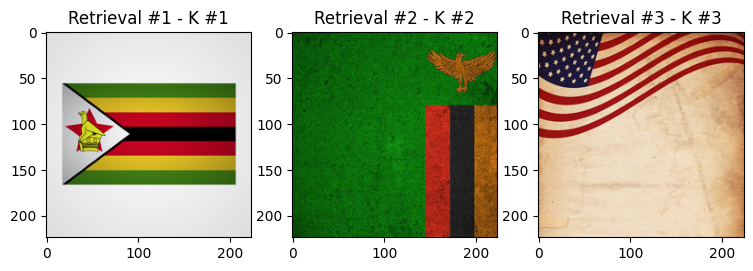

In [5]:
# Do visual arithmetics on the embeddings of the images. Like in ZeroCap
inp_image = (model.visual_embs["countries/japan"] - model.visual_embs["food/sushi"]) + model.visual_embs["food/pizza"]
print(inp_image)
prompt = [inp_image, "[RET]"]

print('Prompt:')
display_interleaved_outputs(prompt)
print('=' * 30)
model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

# Display outputs.
print('Model generated outputs:')
display_interleaved_outputs(model_outputs, one_img_per_ret=False)

### Zero-shot no CoT

Prompt:
Task instruction: Perform the visual arithmetic [1,1,-1] on the following three images and predict the output image. Image:
Answer: [RET]
Model generated outputs:
Task instruction: Perform the visual arithmetic [1,1,-1] on the following three images and predict the output image. [RET]


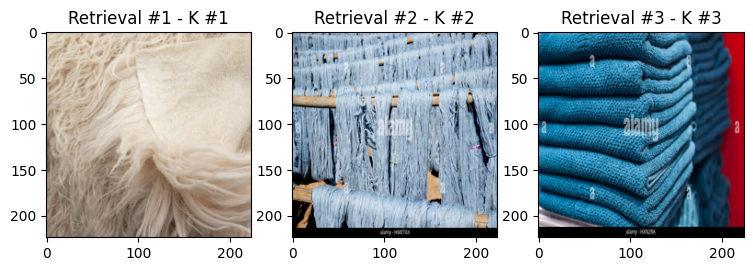

In [6]:
prompt = ["Task instruction: Perform the visual arithmetic [1,1,-1] on the following three images and predict the output image. Image:", model.visual_embs["CEOs/mark_zuckerberg"], model.visual_embs["companies/microsoft"], model.visual_embs["CEOs/bill_gates"], "Answer: [RET]"]

print('Prompt:')
display_interleaved_outputs(prompt)
print('=' * 30)
model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

# Display outputs.
print('Model generated outputs:')
display_interleaved_outputs(model_outputs, one_img_per_ret=False)

### Zero-shot CoT

### Few-shot CoT

# Multi-modal visual arithmetics

### The W2V approach

### Zero-shot no CoT

### Zero-shot CoT

### Few-shot CoT

# Ablation study

### T-SNE